This part of the project will focus on preparing the data for training by:

* Outliers removal;
* Scaling numerical data;
* Encoding categorical features.

-----------

### Importing the required libraries and the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
abalone_df = pd.read_csv("abalone.csv")
abalone_df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
numericalFeatures = abalone_df.describe(include = np.number).columns.tolist()
categoricalFeatures = abalone_df.describe(include = np.object_).columns.tolist()

-------------

### Outliers

We saw in the exploratory data analysis that all the variables are skewed which will represent some problems when training the model. We'll use the interquantile range to remove the data points that are distant from other points.

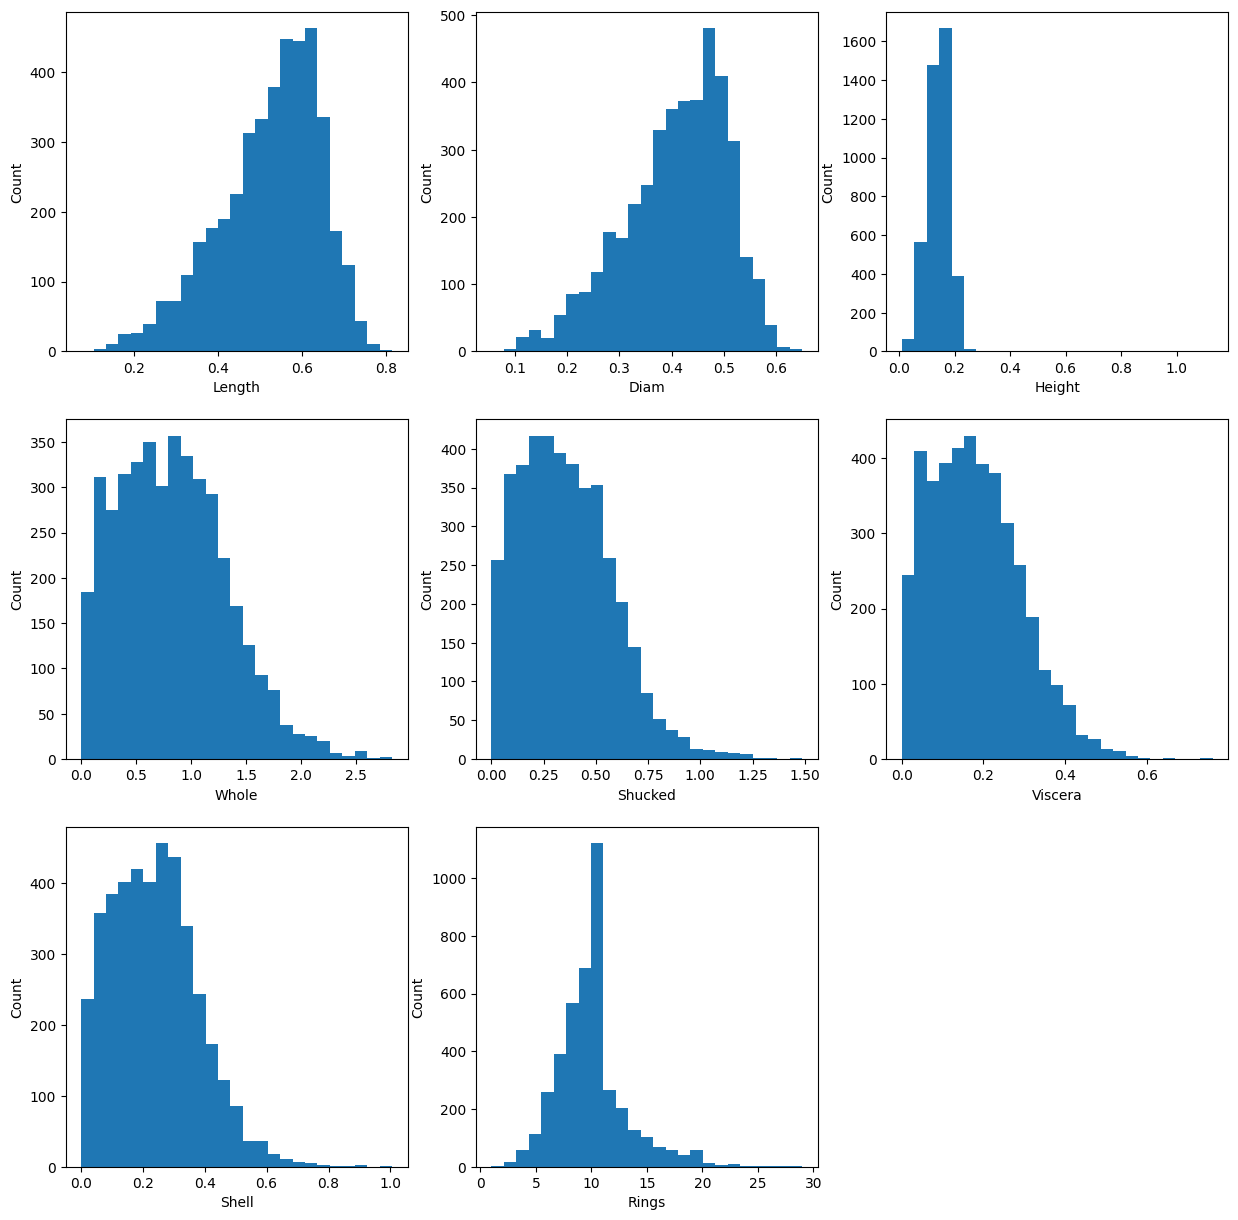

In [4]:
fig = plt.figure(figsize = (15, 15))

for i in range(1, len(numericalFeatures)+1):
    feature = numericalFeatures[i-1]
    ax = fig.add_subplot(3, 3, i)
    ax.hist(abalone_df[feature], bins = 25, histtype = "stepfilled")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

plt.show()

In [5]:
abaloneFiltered = abalone_df.copy()
for column in abaloneFiltered.columns.drop("Sex"):

    Q1 = abalone_df[column].quantile(0.25)
    Q3 = abalone_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    abaloneFiltered = abaloneFiltered[(abaloneFiltered[column] >= lower_bound) & (abaloneFiltered[column] <= upper_bound)]

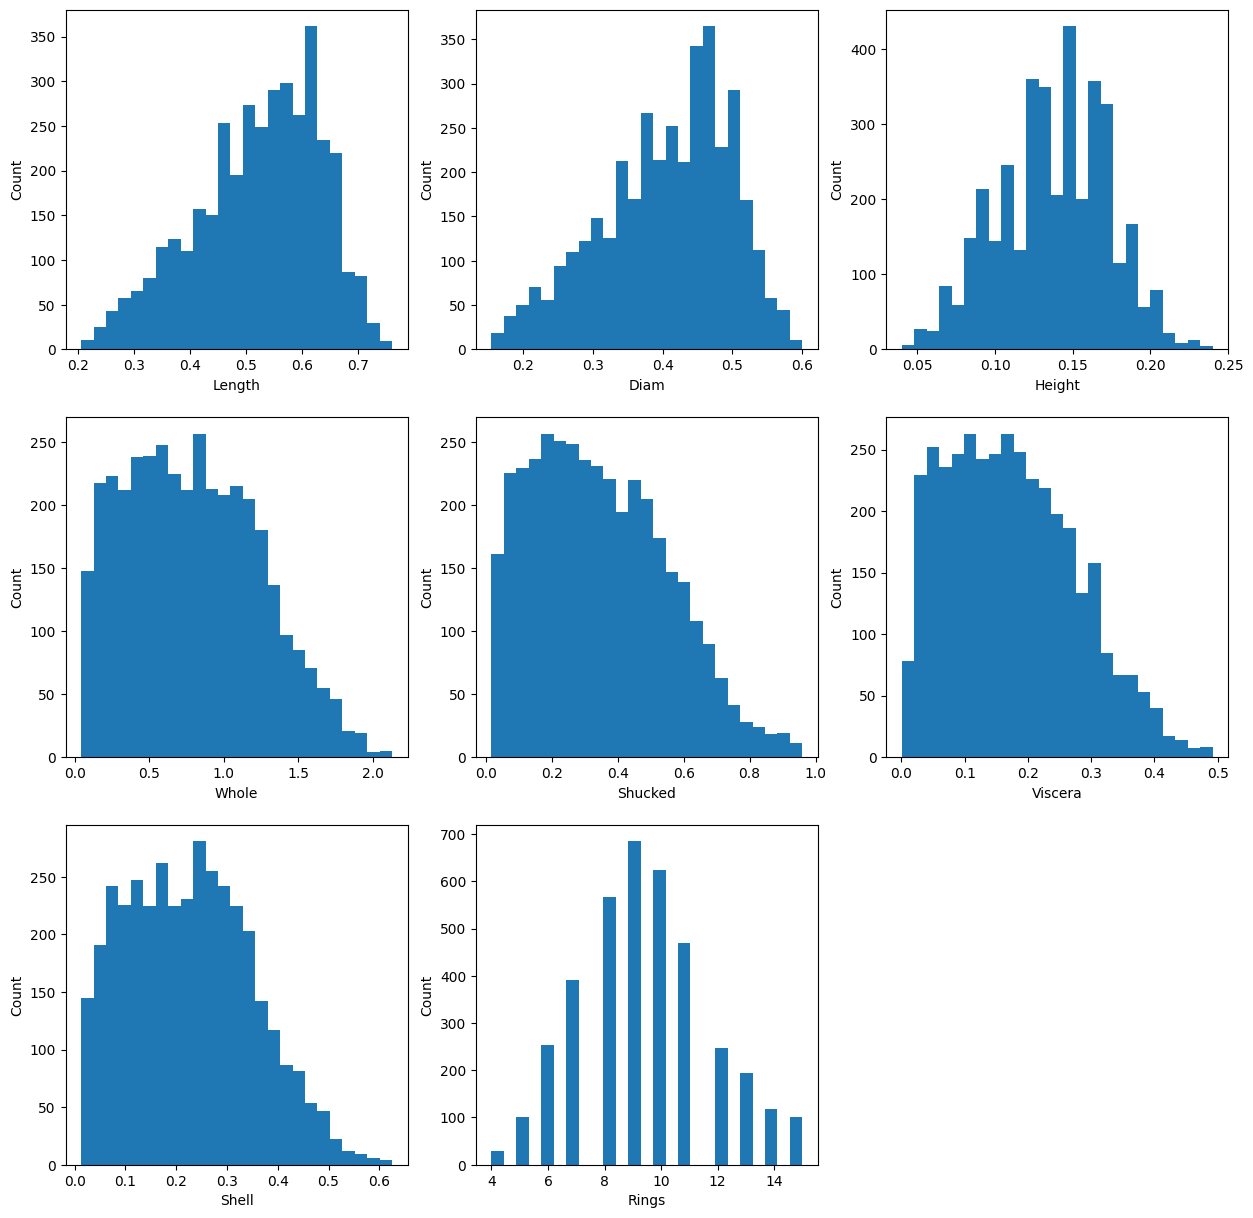

In [6]:
fig = plt.figure(figsize = (15, 15))

for i in range(1, len(numericalFeatures)+1):
    feature = numericalFeatures[i-1]
    ax = fig.add_subplot(3, 3, i)
    ax.hist(abaloneFiltered[feature], bins = 25, histtype = "stepfilled")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

plt.show()

We somehow succeeded to reduce the skewness of the data and this can be confirmed by a small comparaison. 

In [7]:
for column in abalone_df.columns.drop("Sex"):
    print(f"{column} : {abalone_df[column].skew():.3f}")

Length : -0.641
Diam : -0.610
Height : 3.166
Whole : 0.531
Shucked : 0.719
Viscera : 0.591
Shell : 0.621
Rings : 1.114


In [8]:
for column in abaloneFiltered.columns.drop("Sex"):
    print(f"{column} : {abaloneFiltered[column].skew():.3f}")

Length : -0.495
Diam : -0.482
Height : -0.153
Whole : 0.345
Shucked : 0.455
Viscera : 0.455
Shell : 0.342
Rings : 0.269


In [9]:
abaloneFiltered["Rings"] = abaloneFiltered["Rings"] + 1.5

In [11]:
abaloneFiltered.rename(columns = {"Rings":"Age"}, inplace = True)

In [13]:
abaloneFiltered.reset_index(drop = True, inplace = True)

In [16]:
numericalFeatures = abaloneFiltered.describe(include = np.number).columns.drop("Age").tolist()
categoricalFeatures = abaloneFiltered.describe(include = np.object_).columns.tolist()
target = "Age"

cat_df = abaloneFiltered[categoricalFeatures]
num_df = abaloneFiltered[numericalFeatures]
y = abaloneFiltered[target]

---------------

### Feature scaling

In [17]:
#Feature scaling
sc = StandardScaler()
num_df_std = pd.DataFrame(sc.fit_transform(num_df), columns = numericalFeatures)

In [18]:
processed_df = pd.concat([num_df_std, y], axis = 1)
processed_df

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Age
0,-0.592283,-0.433414,-1.199002,-0.625502,-0.604416,-0.719291,-0.619496,16.5
1,-1.533969,-1.517342,-1.340646,-1.274339,-1.218729,-1.237502,-1.270924,8.5
2,0.080351,0.162747,-0.065858,-0.258914,-0.447151,-0.319528,-0.130926,10.5
3,-0.726809,-0.433414,-0.349144,-0.621004,-0.648646,-0.590972,-0.578782,11.5
4,-1.713338,-1.625735,-1.623932,-1.320443,-1.267874,-1.326338,-1.393066,8.5
...,...,...,...,...,...,...,...,...
3776,0.394246,0.487926,0.784001,0.213376,0.110645,0.642863,0.186645,12.5
3777,0.618457,0.379533,-0.065858,0.391047,0.449746,0.401031,0.280287,11.5
3778,0.708142,0.758908,1.917145,0.863337,0.874851,1.121591,0.667072,10.5
3779,0.932353,0.867301,0.359071,0.680044,0.901881,0.860018,0.569358,11.5


In [19]:
processed_df.to_csv("abalone_processed.csv", index = False)